In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

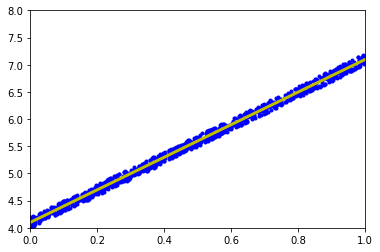

In [2]:
X=np.random.rand(1000,1)
# print(np.max(X))
# print("x",X)
y=4+3*X+.2*np.random.rand(1000,1)
one=np.ones((X.shape[0], 1))
Xbar=np.concatenate((one, X), axis=1)
# print("Xbar", Xbar)
A=np.dot(Xbar.T, Xbar)
B=np.dot(Xbar.T, y)
w=np.dot(np.linalg.pinv(A), B)
x0=np.array([0.,1.])
# print(w.T)
y0=w[1][0]*x0+w[0][0]
# print(w)
plt.plot(X.T, y.T, "b.")
plt.plot(x0.T, y0.T,'y', linewidth=3)
plt.axis([0.,1.,4.,8.])
plt.show()

In [3]:
# tính đạo hàm
def grad(w):
    N=Xbar.shape[0]
    return 1/N*Xbar.T.dot(Xbar.dot(w)-y)

# tính hàm mất mát
def cost(w):
    N=Xbar.shape[0]
    return .5/N*np.linalg.norm(y-Xbar.dot(w), 2)**2

In [4]:
# tương đối đạo hàm
def numerical_grad(w, cost):
    eps=1e-4
    g=np.zeros_like(w)
    for i in range(len(w)):
        #  tạo bản sao của w
        wp=w.copy()
        wn=w.copy()
        wp[i]+=eps;
        wn[i]-=eps
        g[i]=(cost(wp)-cost(wn))/(2*eps)
    return g
# kiểm tra sai số giữa kết quả tính đạo hàm tương đối và đạo hàm
def check_grad(w, cost, grad):
    #tạo mảng random các giá trị nhỏ hơn 1 có chiểu giống vói w
    w=np.random.rand(w.shape[0], w.shape[1])
    # kết quả tính đạo hàm
    grad1=grad(w);
    # kết quả tính tương đối đạo hàm
    grad2=numerical_grad(w, cost)
    # tính toán khoảng cách giữa 2 vector đạo hàm theo chuẩn 2
    return True if np.linalg.norm(grad1-grad2)<1e-6 else False
print(check_grad(np.random.rand(2,1), cost, grad))
# tính toán gradient descent
def myGD(w_init, grad, eta):
    # chuyển ma trận thành mảng để lưu các giá trị w sau mỗi lần lặp
    w=[w_init]
    for it in range(100):
        # tính toán giá trị x(t+1) theo learning rate và đạo hàm
        w_new=w[-1]-eta*grad(w[-1])
        # tính chuẩn của đạo hàm với giá trị mới
        if np.linalg.norm(grad(w_new))/len(w_new)< 1e-3:
            break
        w.append(w_new)
    print(it)
    return (w, it)
w_init=np.array([[2],
                [1]])
(w1, it1)=myGD(w_init, grad, 1)
print(w1[-1].T)
print(it1+1)

True
48
[[4.11407996 2.96775119]]
49


[[5.]]
[[ 5.        ]
 [ 3.71633781]
 [ 2.65710515]
 [ 2.05728849]
 [ 1.57352371]
 [ 0.82615804]
 [-0.68940855]
 [-2.68715913]
 [-3.04919299]
 [-1.76945069]
 [-0.06644214]
 [ 0.48176045]
 [-0.00738992]
 [-1.44611996]
 [-2.57610663]
 [-2.23354502]
 [-0.86324459]
 [-0.10730044]
 [-0.39973944]
 [-1.50414908]
 [-2.26388586]
 [-1.85595486]
 [-0.8363164 ]
 [-0.42157977]
 [-0.87644447]
 [-1.75042131]
 [-2.0082556 ]
 [-1.41501597]
 [-0.75324817]
 [-0.73647844]
 [-1.31492852]
 [-1.82563294]
 [-1.66805303]
 [-1.09551705]
 [-0.81871805]
 [-1.08901328]
 [-1.57783633]
 [-1.69516986]
 [-1.33768294]
 [-0.97941593]
 [-1.01859996]
 [-1.37470401]
 [-1.61509489]
 [-1.46414363]
 [-1.14190939]
 [-1.0393755 ]
 [-1.24597864]
 [-1.50186174]
 [-1.50066419]
 [-1.26952822]
 [-1.10433164]
 [-1.18451988]
 [-1.39652716]
 [-1.4814167 ]
 [-1.35079461]
 [-1.18130711]
 [-1.17222287]
 [-1.3177065 ]
 [-1.43549701]
 [-1.38929597]
 [-1.25036133]
 [-1.19022733]
 [-1.26951008]
 [-1.3837113 ]
 [-1.39574572]
 [-1.30158552]
 [-

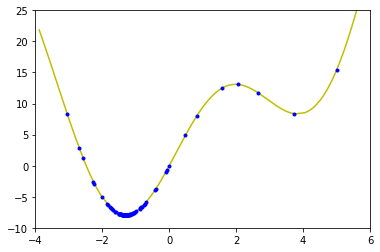

In [81]:
theta_init=5* np.ones((1,1))
print(theta_init)
eta=.1
gamma=.9
x=10*np.random.rand(200)-4
x=np.sort(x)
y=x**2+10*np.sin(x)
plt.plot(x, y, "y")
plt.axis([-4, 6, -10, 25])

# tính đạo hàm của f(x)=x^2+10sin(x)
def fx(x):
    return x**2+10*np.sin(x)
def gradsin(w):
    
# kiểm tra giá trị thỏa mãn globalmin
def has_converged(theta_new, gradsin):
        return np.linalg.norm(gradsin(theta_new))< 1e-3
def GD_momentum(theta_init, gradsin, eta, gamma):
    # chuyền về mảng để lưu các vị trí mới
    theta=[theta_init]
    v_old=np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*gradsin(theta[-1])
       
        theta_new= theta[-1]-v_new
   
        if(has_converged(theta_new, gradsin)):
            break
        theta.append(theta_new)
        v_old=v_new
    return theta
# print(np.linalg.norm(gradsin(theta_init)))
x0=GD_momentum(theta_init, gradsin, eta, gamma)
x0=np.asarray(x0)
x0=np.reshape(x0, (x0.shape[0],1))
print(x0)

y0=x0**2+10*np.sin(x0)
plt.plot(x0, y0, 'b.')
plt.show()